# Perceptron
Sean Wade

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import cPickle

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('Fisher.csv')
m = data.as_matrix()
labels = m[:,0]
labels[labels==2] = 1  # squash class 2 into class 1
labels = np.atleast_2d(labels).T
features = m[:,1:5]

In [16]:
with open('cifar-10-batches-py/data_batch_1') as load:
    data = cPickle.load(load)


c_features = data['data']
c_labels = data['labels']
c_labels = np.atleast_2d( c_labels ).T

# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
c_labels[ c_labels < 5 ] = 0
c_labels[ c_labels >= 5 ] = 1

In [13]:
class Perceptron:
    
    def __init__(self):
        self.features = None
        self.labels = None
        self.w = None
        self.c = None
        self.accuracy = []
        self.norms = []

    def _f(self, x):
        return np.dot(self.w,x) > 0

    def train(self, features, labels, c, n_iters=100, verbose=False):
        self.features = np.hstack((features, np.ones((features.shape[0], 1))))
        self.labels = labels.flatten()
        self.w = np.random.normal(0, .001, self.features.shape[1])
        self.c = c
        self.cat = np.zeros(len(labels))
        
        for i in xrange(n_iters):
            for j in xrange(len(self.features)):
                y = self._f(self.features[j])
                self.cat[j] = y
                #only updates if it is wrong
                self.w = self.w + self.c * (self.labels[j] - y) * self.features[j]
            
            self.accuracy.append((float(len(self.cat)) - np.sum(np.abs(self.cat - self.labels))) / float(len(self.cat)))
            self.norms.append(np.dot(self.w, self.w))
            
        if verbose:
            print "c({}): {}".format(self.c, self.w)
            
    def classify(self, sample):
        return self._f(sample)

c(1.0): [ 37.99841759  68.00049492 -38.99914225 -11.99980791  -0.99995989]
c(0.1): [ 3.79917936  6.80031597 -3.9002134  -1.19925007 -0.0983332 ]
c(0.01): [ 0.3795358   0.65892043 -0.46888723 -0.13159934 -0.00941663]


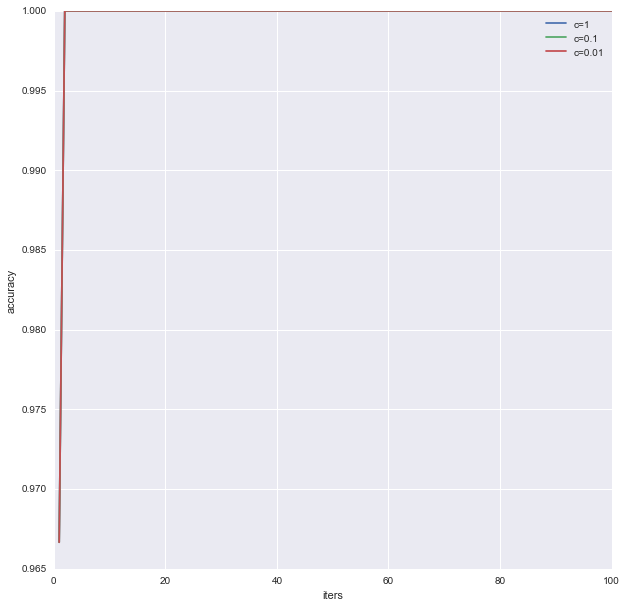

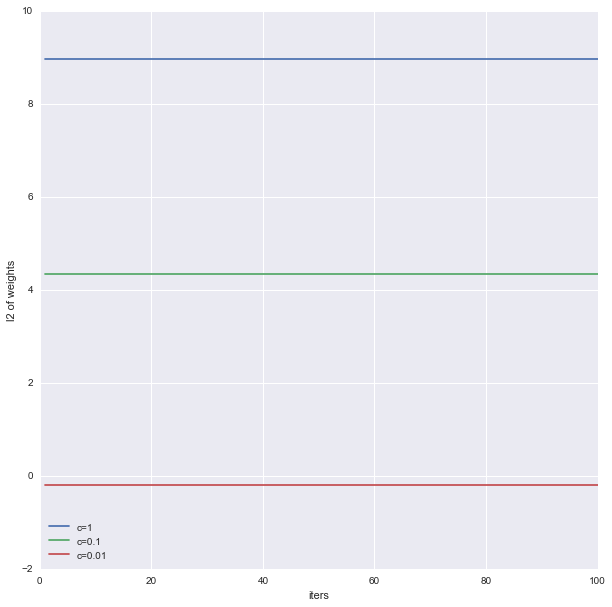

In [18]:
p1 = Perceptron() 
p1.train(features, labels, 1.0, verbose=True)

p2 = Perceptron() 
p2.train(features, labels, 0.1, verbose=True)

p3 = Perceptron() 
p3.train(features, labels, 0.01, verbose=True)

t = np.linspace(1,100,100)

# plot accuracy
plt.figure(figsize=(10,10))
plt.plot(t, p1.accuracy, label='c=1')
plt.plot(t, p2.accuracy, label='c=0.1')
plt.plot(t, p3.accuracy, label='c=0.01')
plt.xlabel('iters'); plt.ylabel('accuracy')
plt.legend(loc=0)
plt.show()

# plot weights
plt.figure(figsize=(10,10))
plt.plot(t, np.log(p1.norms), label='c=1')
plt.plot(t, np.log(p2.norms), label='c=0.1')
plt.plot(t, np.log(p3.norms), label='c=0.01')
plt.xlabel('iters'); plt.ylabel('l2 of weights')
plt.legend(loc=0)
plt.show()

c(0.001): [-21.64278047 -17.37564759  21.67269783 ...,  -3.93793186  23.13090755
  -1.55821803]
c(1e-05): [-0.23610687 -0.18573008  0.19745219 ..., -0.05940322  0.19537536
 -0.01518387]


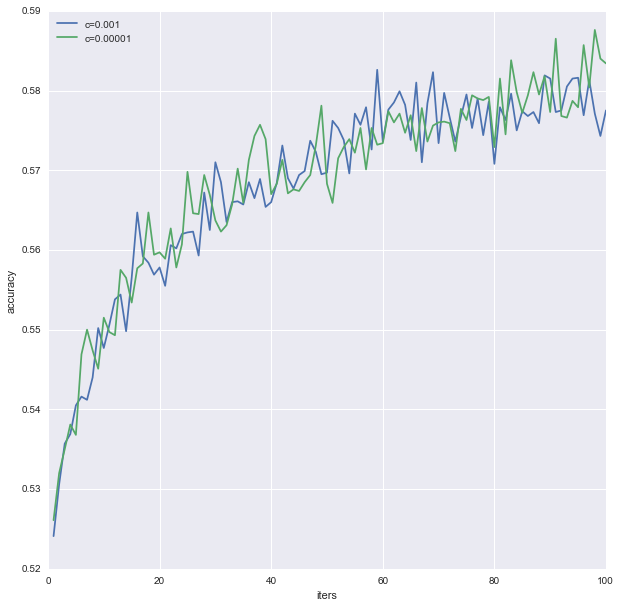

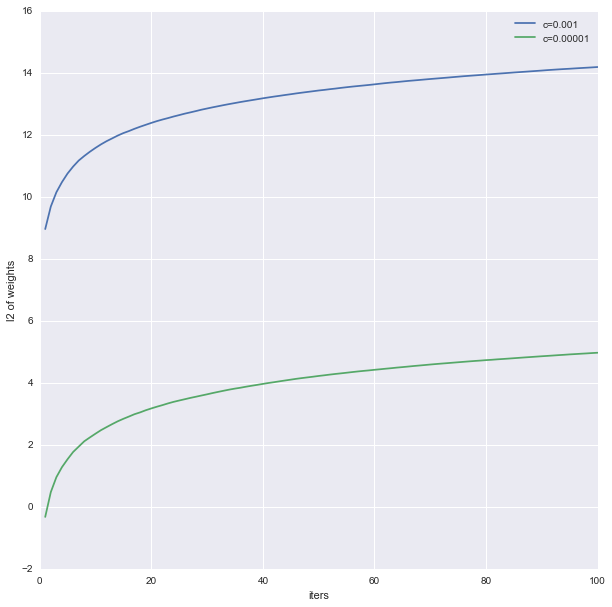

In [19]:
p4 = Perceptron() 
p4.train(c_features, c_labels, 0.001, verbose=True)

p5 = Perceptron() 
p5.train(c_features, c_labels, 0.00001, verbose=True)

# plot accuracy
plt.figure(figsize=(10,10))
plt.plot(t, p4.accuracy, label='c=0.001')
plt.plot(t, p5.accuracy, label='c=0.00001')
plt.xlabel('iters'); plt.ylabel('accuracy')
plt.legend(loc=0)
plt.show()

# plot weights
plt.figure(figsize=(10,10))
plt.plot(t, np.log(p4.norms), label='c=0.001')
plt.plot(t, np.log(p5.norms), label='c=0.00001')
plt.xlabel('iters'); plt.ylabel('l2 of weights')
plt.legend(loc=0)
plt.show()